https://www.kaggle.com/competitions/titanic/overview

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import kaggle
from sklearn.linear_model import LogisticRegression as lo

In [2]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
import os

zip_path = r'D:/Documents/python_projects/titanic/titanic.zip'
extract_to = r'D:/Documents/python_projects/titanic/'

# Распаковка
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [4]:
df_train = pd.read_csv(os.path.join(extract_to, 'train.csv'))
df_test = pd.read_csv(os.path.join(extract_to, 'test.csv'))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
descript = pd.DataFrame({
    'PassengerId': ['ID пассажира'],
    'Survived': ['Выжил (1) или нет (0)'],
    'Pclass': ['1-й = Верхний, 2-й = Средний, 3-й = Нижний'],
    'Name': ['Имя пассажира'],
    'Sex': ['Пол пассажира'],
    'Age': ['Возраст пассажира в годах'],
    'SibSp': ['Количество братьев/сестер и супругов на борту'],
    'Parch': ['Количество родителей и детей на борту'],
    'Ticket': ['Номер билета'],
    'Fare': ['Пассажирский тариф'],
    'Cabin': ['Номер каюты'],
    'Embarked': ['Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)']
})

descript.T

,0
PassengerId,ID пассажира
Survived,Выжил (1) или нет (0)
Pclass,"1-й = Верхний, 2-й = Средний, 3-й = Нижний"
Name,Имя пассажира
Sex,Пол пассажира
Age,Возраст пассажира в годах
SibSp,Количество братьев/сестер и супругов на борту
Parch,Количество родителей и детей на борту
Ticket,Номер билета
Fare,Пассажирский тариф


Text(0.5, 1.0, 'Распределение выживших')

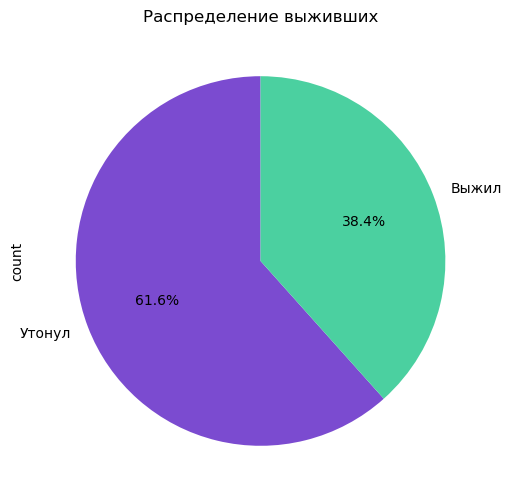

In [10]:
survived_counts = df_train['Survived'].value_counts()
survived_counts.index = ['Утонул', 'Выжил']


plt.figure(figsize=(10,6))
survived_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#7B4BD0', "#4BD0A0"])
plt.title('Распределение выживших')

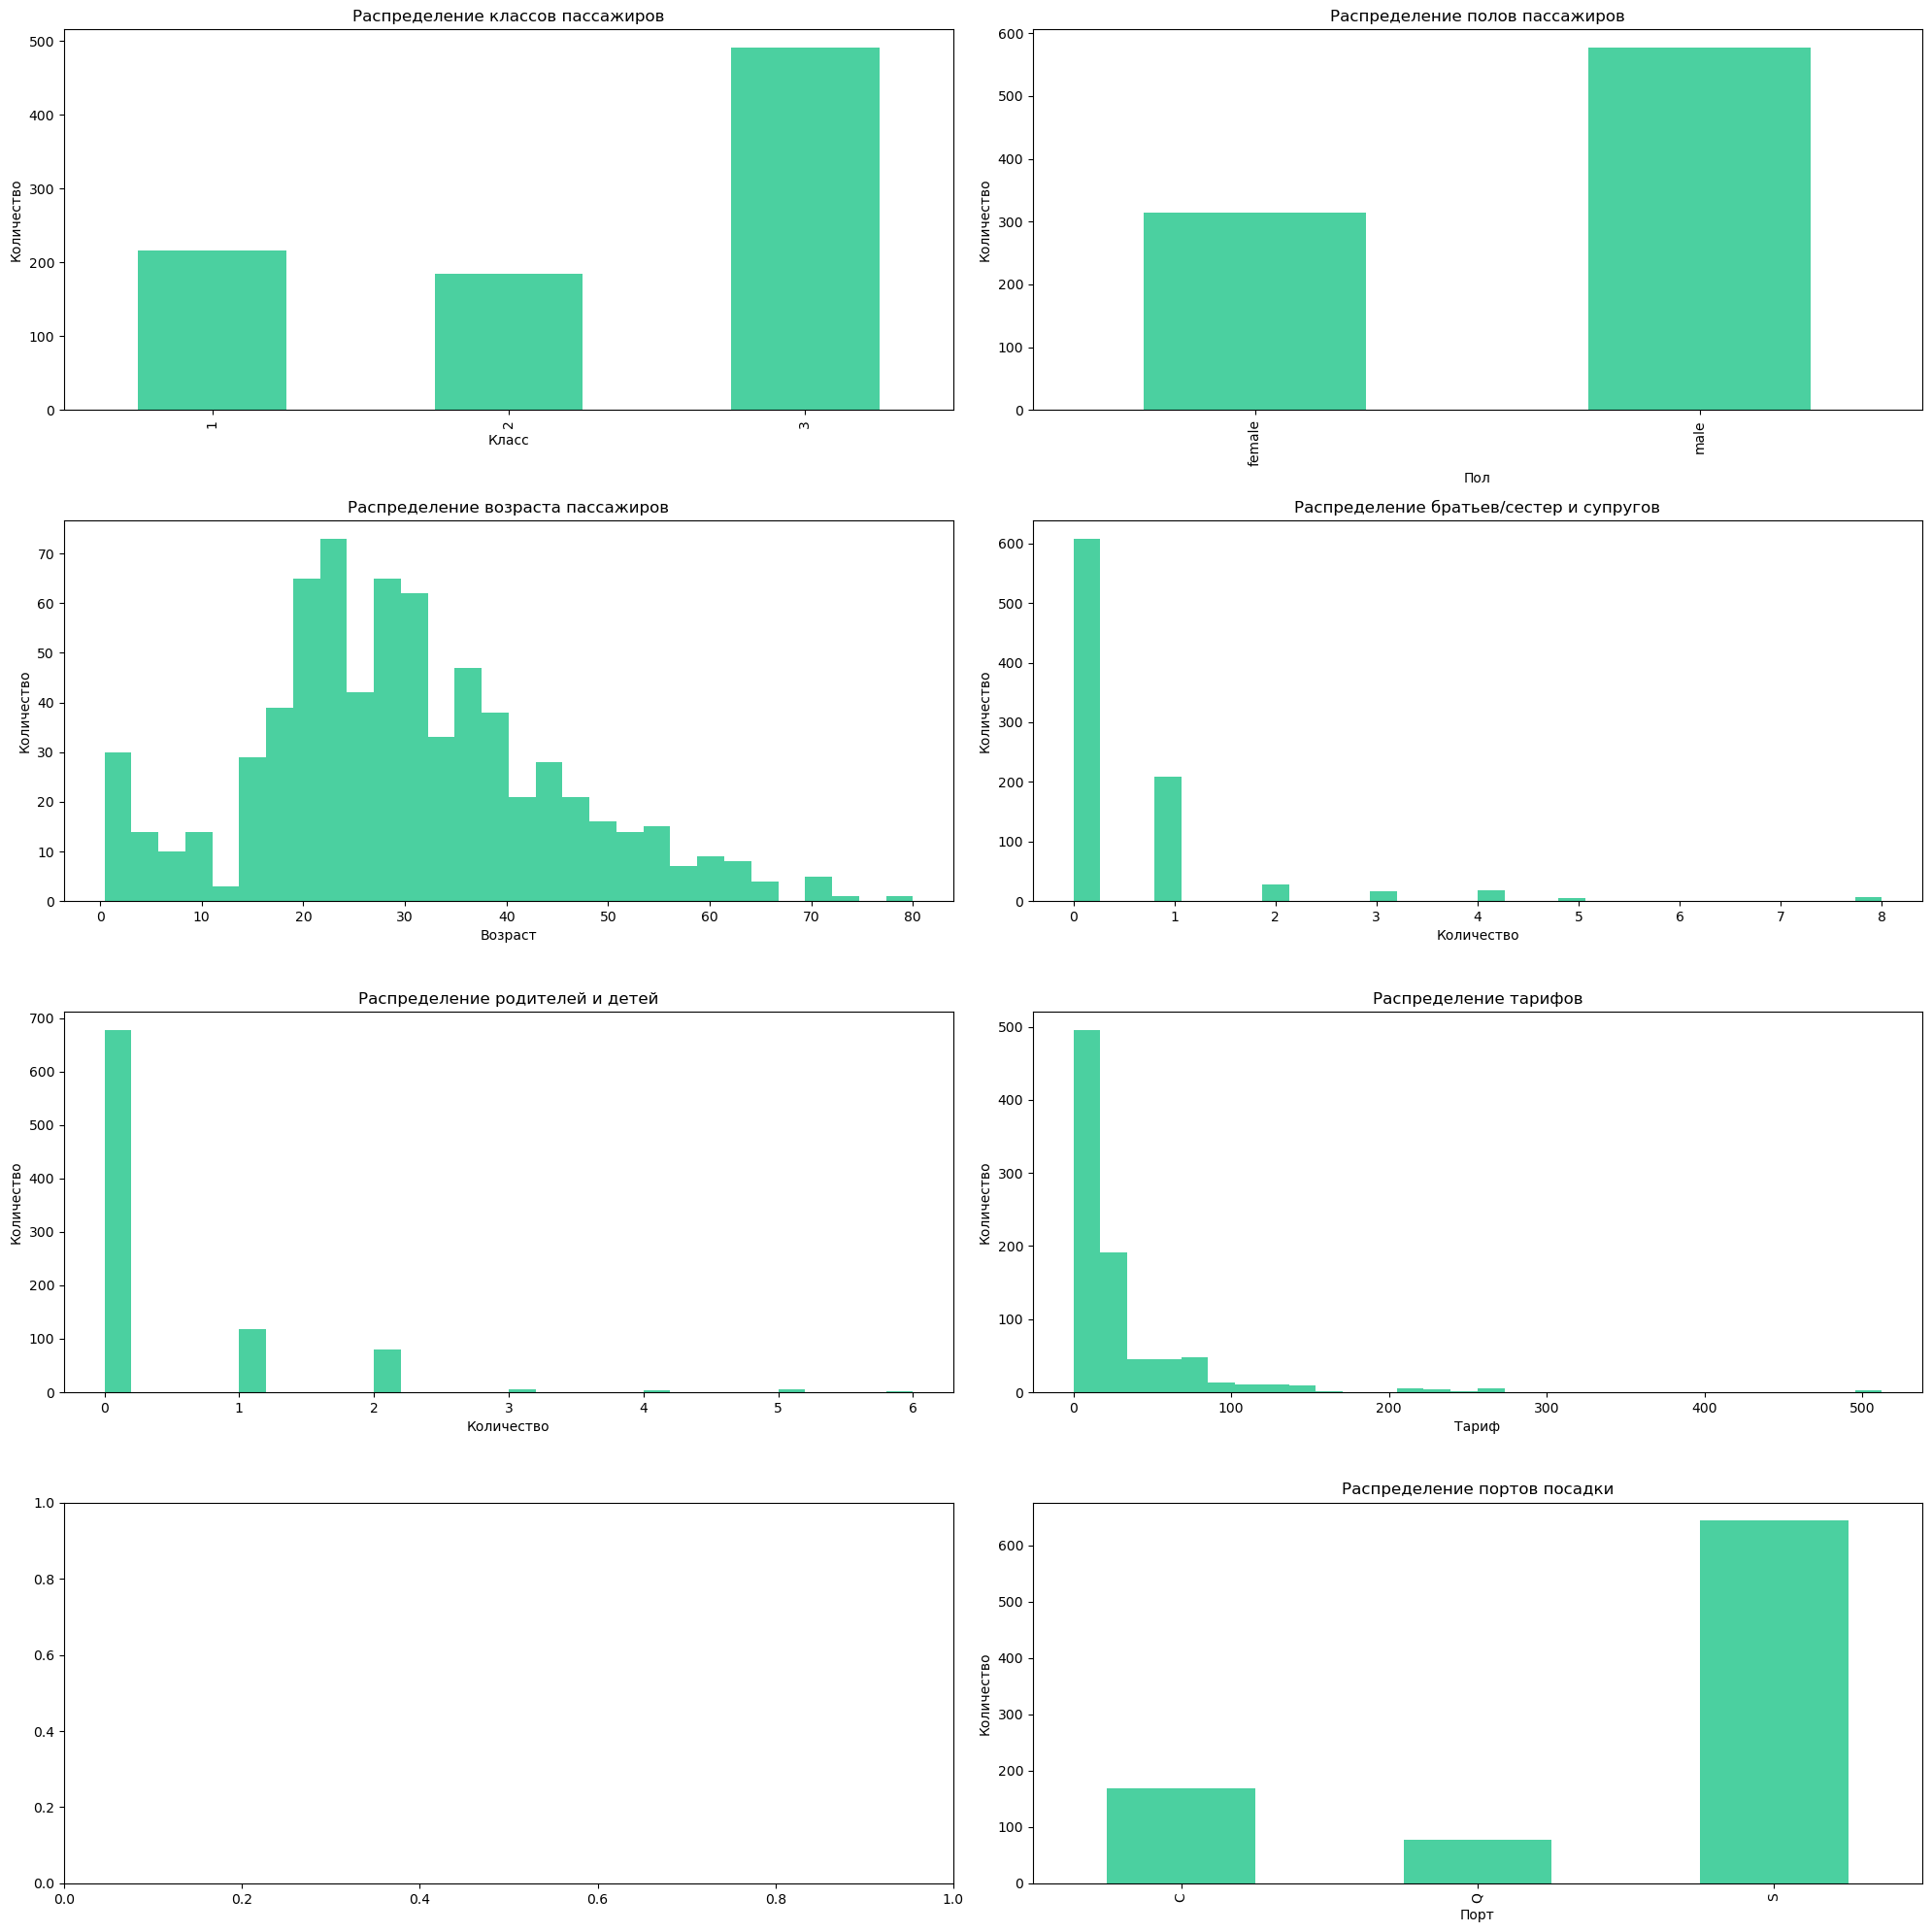

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 строки, 2 столбца

# 1. Классы пассажиров
df_train['Pclass'].value_counts().sort_index().plot.bar(
    color='#4BD0A0',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Распределение классов пассажиров')
axes[0, 0].set_xlabel('Класс')
axes[0, 0].set_ylabel('Количество')

# 2. Пол пассажиров
df_train['Sex'].value_counts().sort_index().plot.bar(
    color='#4BD0A0',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Распределение полов пассажиров')
axes[0, 1].set_xlabel('Пол')
axes[0, 1].set_ylabel('Количество')

# 3. Возраст пассажиров
df_train['Age'].plot.hist(
    bins=30,
    color='#4BD0A0',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Распределение возраста пассажиров')
axes[1, 0].set_xlabel('Возраст')
axes[1, 0].set_ylabel('Количество')

# 4. Кол-во братьев/сестер и супругов
df_train['SibSp'].plot.hist(
    bins=30,
    color='#4BD0A0',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Распределение братьев/сестер и супругов')
axes[1, 1].set_xlabel('Количество')
axes[1, 1].set_ylabel('Количество')

# 5. Кол-во родителей и детей
df_train['Parch'].plot.hist(
    bins=30,
    color='#4BD0A0',
    ax=axes[2, 0]
)
axes[2, 0].set_title('Распределение родителей и детей')
axes[2, 0].set_xlabel('Количество')
axes[2, 0].set_ylabel('Количество')

# 6. Тарифы
df_train['Fare'].plot.hist(
    bins=30,
    color='#4BD0A0',
    ax=axes[2, 1]
)
axes[2, 1].set_title('Распределение тарифов')
axes[2, 1].set_xlabel('Тариф')
axes[2, 1].set_ylabel('Количество')

# # 7. Кабина
# df_train['Cabin'].value_counts().sort_index().plot.bar(
#     color='#4BD0A0',
#     ax=axes[3, 0]
# )
# axes[3, 0].set_title('Распределение кают')
# axes[3, 0].set_xlabel('Каюта')
# axes[3, 0].set_ylabel('Количество')

# 8. Порт посадки
df_train['Embarked'].value_counts().sort_index().plot.bar(
    color='#4BD0A0',
    ax=axes[3, 1]
)
axes[3, 1].set_title('Распределение портов посадки')
axes[3, 1].set_xlabel('Порт')
axes[3, 1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

In [12]:
descript.T

,0
PassengerId,ID пассажира
Survived,Выжил (1) или нет (0)
Pclass,"1-й = Верхний, 2-й = Средний, 3-й = Нижний"
Name,Имя пассажира
Sex,Пол пассажира
Age,Возраст пассажира в годах
SibSp,Количество братьев/сестер и супругов на борту
Parch,Количество родителей и детей на борту
Ticket,Номер билета
Fare,Пассажирский тариф


In [13]:
df_train['Cabin'].isnull().mean()*100

np.float64(77.10437710437711)

In [14]:
df_train_for_lo = df_train[['PassengerId', 
                            'Survived', 
                            'Pclass', 
                            # 'Name', 
                            'Sex', 
                            'Age', 
                            'SibSp',
                            'Parch', 
                            # 'Ticket', 
                            'Fare', 
                            # 'Cabin', 
                            'Embarked']]

In [15]:
display(df_train_for_lo)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [16]:
df_train_for_lo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [17]:
df_train_for_lo = df_train_for_lo[df_train_for_lo['Embarked'].notnull()]

In [18]:
descript.T

,0
PassengerId,ID пассажира
Survived,Выжил (1) или нет (0)
Pclass,"1-й = Верхний, 2-й = Средний, 3-й = Нижний"
Name,Имя пассажира
Sex,Пол пассажира
Age,Возраст пассажира в годах
SibSp,Количество братьев/сестер и супругов на борту
Parch,Количество родителей и детей на борту
Ticket,Номер билета
Fare,Пассажирский тариф


In [19]:
# Преобразование категориальных признаков в числовые Sex и Embarked
df_train_for_lo['Sex'] = df_train_for_lo['Sex'].map({'male': 0, 'female': 1})
df_train_for_lo['Embarked'] = df_train_for_lo['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) 
# Заполнение пропущенных значений в Age средним значением возраста
df_train_for_lo['Age'].fillna(df_train_for_lo['Age'].mean(), inplace=True)

C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\3879330988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_for_lo['Sex'] = df_train_for_lo['Sex'].map({'male': 0, 'female': 1})
C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\3879330988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_for_lo['Embarked'] = df_train_for_lo['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\3879330988.py:5: FutureWarning: A value is trying to be set on a copy 

In [20]:
df_train_for_lo

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0
887,888,1,1,1,19.000000,0,0,30.0000,0
888,889,0,3,1,29.642093,1,2,23.4500,0
889,890,1,1,0,26.000000,0,0,30.0000,1


In [21]:
X = df_train_for_lo.loc[:, df_train_for_lo.columns != 'Survived']
y = df_train_for_lo.loc[:, df_train_for_lo.columns == 'Survived']

In [22]:
model = lo(random_state=42).fit(X, y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = model.predict(X)

In [24]:
model.score(X, y)

0.8008998875140607

In [25]:
df_test_for_lo = df_test[['PassengerId', 
                           'Pclass', 
                           'Sex', 
                           'Age', 
                           'SibSp',
                           'Parch', 
                           'Fare', 
                           'Embarked']]

# 2. Преобразуем категориальные признаки в числовые (используя то же сопоставление)
df_test_for_lo['Sex'] = df_test_for_lo['Sex'].map({'male': 0, 'female': 1})
df_test_for_lo['Embarked'] = df_test_for_lo['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\1220499287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_for_lo['Sex'] = df_test_for_lo['Sex'].map({'male': 0, 'female': 1})
C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\1220499287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_for_lo['Embarked'] = df_test_for_lo['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [26]:
# 3. Заполняем пропуски в 'Age' и 'Fare'. 
# ВАЖНО: Используем среднее значение из ТРЕНИРОВОЧНОГО набора, чтобы избежать "утечки данных".
mean_age_train = df_train_for_lo['Age'].mean()
df_test_for_lo['Age'].fillna(mean_age_train, inplace=True)

# В тестовом наборе есть один пропуск в 'Fare', заполним его средним значением тарифа из тренировочного набора
mean_fare_train = df_train_for_lo['Fare'].mean()
df_test_for_lo['Fare'].fillna(mean_fare_train, inplace=True)

# Проверим, что пропусков не осталось
print(df_test_for_lo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB
None


C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\1877859084.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_for_lo['Age'].fillna(mean_age_train, inplace=True)
C:\Users\dogot\AppData\Local\Temp\ipykernel_13260\1877859084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_for_lo['Age'].fillna(mean_age_train, inplace=True)
C

In [27]:
# Делаем предсказания для тестовой выборки
test_predictions = model.predict(df_test_for_lo)

In [28]:
predictions = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': test_predictions
})

In [29]:
# Сохраняем DataFrame в csv-файл. index=False, чтобы не записывать индекс DataFrame в файл.
predictions.to_csv('submission.csv', index=False)

print("Файл submission.csv успешно создан!")
display(predictions.head())

Файл submission.csv успешно создан!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
